# Star Wars Survey

This is a guided project from dataquest.io.  
Based a data from FiveThirtyEight from a survey of Star Wars fans.  

This project will focus on cleaning the dataset.

In [37]:
import pandas as pd
star_wars = pd.read_csv("data/Star wars survey.csv", encoding="ISO-8859-1")

In [38]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,3292879998,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3.0,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
1,3292879538,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
2,3292765271,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
3,3292763116,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
4,3292731220,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3292719380,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1.0,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
6,3292684787,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6.0,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
7,3292663732,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4.0,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
8,3292654043,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5.0,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
9,3292640424,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1.0,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific

In [39]:
# show column names
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Some key columns are:

- `RespondentID` — An anonymized ID for the respondent (person taking the survey)
- `Gender` — the respondent's gender
- `Age` — the respondent's age
- `Household Income` — the respondent's income
- `Education` — the respondent's education level
- `Location (Census Region)` — the respondent's location
- `Have you seen any of the 6 films in the Star Wars franchise?` — a Yes or No response
- `Do you consider yourself to be a fan of the Star Wars film franchise?` — a Yes or No response

The other columns are the output of tickbox type questions, with subsequent columns name as `Unnamed`. The question asking people to rank characters is tricky as the character names are missing.

### Cleaning and Mapping Yes/No Columns

`Have you seen any of the 6 films in the Star Wars franchise?` and `Do you consider yourself to be a fan of the Star Wars film franchise?` are both Yes/No questions. We will replace them with bool values to make data easier to work with.

In [40]:
# dictionary for mapping
yes_no = {"Yes" : True, "No" : False}
# map to columns
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(yes_no)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(yes_no)

In [41]:
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts()

True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64

In [42]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

### Cleaning and Mapping Checkbox Columns

`Which of the following Star Wars films have you seen? Please select all that apply.` and the subsequent five columns will be renamed and mapped to bool values to indicate whether the individual has seen a movie int he franchise.

In [43]:
import numpy as np
# dictionary for mapping
seen_map = {"Star Wars: Episode I  The Phantom Menace": True,
            "Star Wars: Episode II  Attack of the Clones": True,
            "Star Wars: Episode III  Revenge of the Sith": True,
            "Star Wars: Episode IV  A New Hope": True,
            "Star Wars: Episode V The Empire Strikes Back": True,
            "Star Wars: Episode VI Return of the Jedi": True,
    np.NaN: False}

In [44]:
for col in star_wars.columns[3:9]:
    star_wars[col] =   star_wars[col].map(seen_map)

In [45]:
star_wars[star_wars.columns[3:9]].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,True,True,True,True,True,True
1,False,False,False,False,False,False
2,True,True,True,False,False,False
3,True,True,True,True,True,True
4,True,True,True,True,True,True


In [46]:
# dictionary for renaming
seen_rename = {"Which of the following Star Wars films have you seen? Please select all that apply.": "seen_1",
            "Unnamed: 4": "seen_2",
            "Unnamed: 5": "seen_3",
            "Unnamed: 6": "seen_4",
            "Unnamed: 7": "seen_5",
            "Unnamed: 8": "seen_6"}

In [47]:
star_wars = star_wars.rename(columns=seen_rename)

In [48]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you 

### Cleaning the ranking columns

Cleaning the `Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.` coluumns and subsquent 5 columns.

In [49]:
# convert to float
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [50]:
# dictionary for renaming
ranking_rename = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "ranking_1",
            "Unnamed: 10": "ranking_2",
            "Unnamed: 11": "ranking_3",
            "Unnamed: 12": "ranking_4",
            "Unnamed: 13": "ranking_5",
            "Unnamed: 14": "ranking_6"}

In [51]:
star_wars = star_wars.rename(columns=ranking_rename)

In [52]:
print(star_wars.columns)

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'seen_1', 'seen_2', 'seen_3', 'seen_4', 'seen_5', 'seen_6', 'ranking_1',
       'ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expanded Universe?',
       'Do you consider yourself to be a fan of the Expanded Universe?',
       'Do you consider yourself to be a fan of the Star Trek franchise?',
       'Gender', 'Age', 'Household Income', 'Education',
       'Location (Census Region)'],
   

### Finding the highest ranked movie

In [53]:
mean_ranks = star_wars[star_wars.columns[9:15]].mean()

In [54]:
print(mean_ranks)

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64


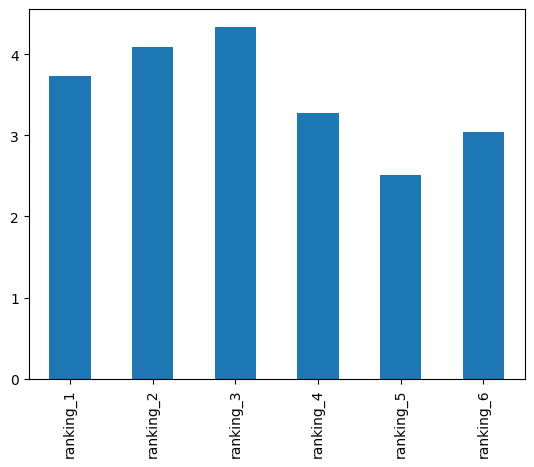

In [55]:
from matplotlib import pyplot as plt
%matplotlib inline

mean_ranks.plot.bar()
plt.show()

From this survey `Episode V: Empire Strikes Back` was the highest rated with a mean rank on 2.5.

Complete ranking
1. Star Wars: Episode V The Empire Strikes Back
2. Star Wars: Episode VI Return of the Jedi
3. Star Wars: Episode IV A New Hope
4. Star Wars: Episode I The Phantom Menace
5. Star Wars: Episode II Attack of the Clones
6. Star Wars: Episode III Revenge of the Sith

The newer three movies (The Prequels) were ranked in the same order that they were released. Which is surprising as Episode III is generally perceived now as the best of the prequels. It maybe because this survey took place between the release of Episode III and Episode VII, so perhaps the prequels has not yet developed nostalgia amognst the fans.

### Finding the most viewed movie

Next I will use the cleaned `seen` columns from earlier to calculate the most viewed movie in the franchise.

In [56]:
seen_sum = star_wars[star_wars.columns[3:9]].sum()
print(seen_sum)

seen_1    673
seen_2    571
seen_3    550
seen_4    607
seen_5    758
seen_6    738
dtype: int64


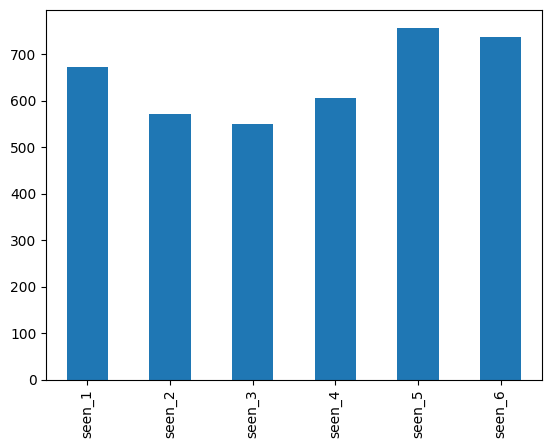

In [57]:
seen_sum.plot.bar()
plt.show()

From this survey `Episode V: Empire Strikes Back` was the most viewed with a total of 758 viewers.

This shows that the older the movie is the more viewers it has had. With the exception of Episode IV: A New Hope having less viewers than Episode I.

The results of the seen columns echo the ranking columns. Which raises the question: 
> Have the most people watched Episode V becuase it's the best or is Episode V the highest ranked because the most people have watched it?

### Exploring data by binary segments

I will split to dataset on the `Do you consider yourself to be a fan of the Star Wars film franchise?` and repeat the above analysis to see the impact

In [58]:
fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == True]
not_fans = star_wars[star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] == False]

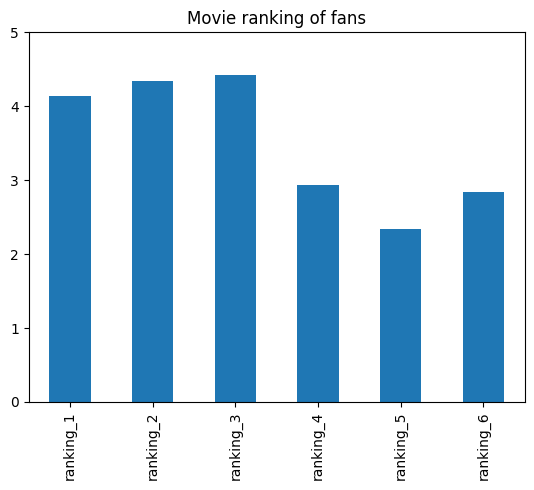

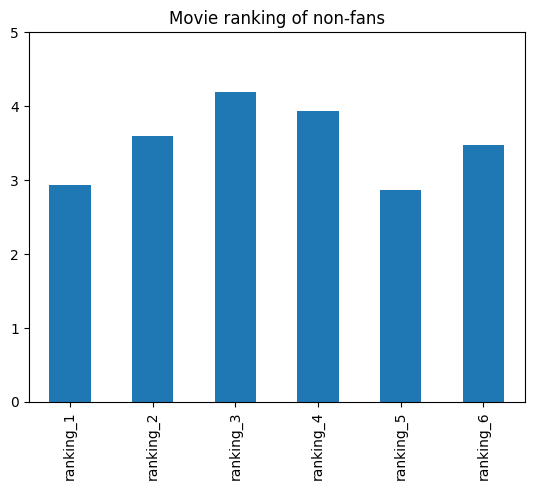

In [59]:
fans[fans.columns[9:15]].mean().plot.bar()
plt.title("Movie ranking of fans")
plt.ylim([0,5])
plt.show()
not_fans[not_fans.columns[9:15]].mean().plot.bar()
plt.title("Movie ranking of non-fans")
plt.ylim([0,5])
plt.show()

From this survey those whose identify as Star Wars fans are more likely to rank the original triology higher than the prequels. Whereas non-fans rankings are slightly more evenly spread.  
Both groups prefer Episode V and least prefer Episode III. But non-fans are more likely to prefer Episode I to Episode IV or VI.

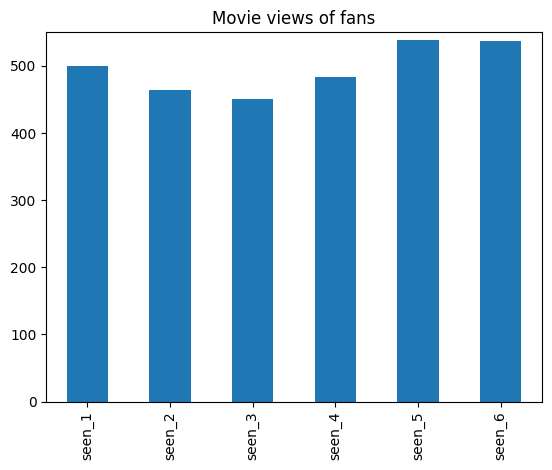

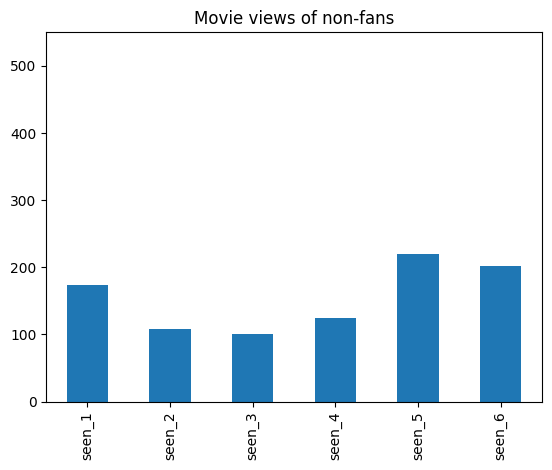

In [60]:
fans[fans.columns[3:9]].sum().plot.bar()
plt.title("Movie views of fans")
plt.ylim([0,550])
plt.show()
not_fans[not_fans.columns[3:9]].sum().plot.bar()
plt.title("Movie views of non-fans")
plt.ylim([0,550])
plt.show()

The above higlights that there are more individuals who identify as fans than non-fans. The patterns of movies watched are similar across the two groups; with Episode V most watched and Episode III least watched for both.

### Cleaning and Mapping the character preference columns

In [61]:
print(star_wars[star_wars.columns[15:29]].head())

  Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.  \
0                                     Very favorably                                                               
1                                                NaN                                                               
2                                 Somewhat favorably                                                               
3                                     Very favorably                                                               
4                                     Very favorably                                                               

          Unnamed: 16         Unnamed: 17           Unnamed: 18  \
0      Very favorably      Very favorably        Very favorably   
1                 NaN                 NaN                   NaN   
2  Somewhat favorably  Somewhat favorably    Somewhat favorably   
3      Very favorably      Very fav

In [62]:
character_names = {"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo", 
                   "Unnamed: 16": "Luke Skywalker", "Unnamed: 17": "Princess Leia Organa", "Unnamed: 18": "Anakin Skywalker",
                   "Unnamed: 19": "Obi Wan Kenobi", "Unnamed: 20": "Emperor Palpatine", "Unnamed: 21": "Darth Vader",
                   "Unnamed: 22": "Lando Calrissian", "Unnamed: 23": "Boba Fett", "Unnamed: 24": "C-3P0",
                   "Unnamed: 25": "R2 D2", "Unnamed: 26": "Jar Jar Binks", "Unnamed: 27": "Padme Amidala",
                   "Unnamed: 28": "Yoda"}

In [63]:
star_wars = star_wars.rename(columns=character_names)
print(star_wars.columns[15:29])

Index(['Han Solo', 'Luke Skywalker', 'Princess Leia Organa',
       'Anakin Skywalker', 'Obi Wan Kenobi', 'Emperor Palpatine',
       'Darth Vader', 'Lando Calrissian', 'Boba Fett', 'C-3P0', 'R2 D2',
       'Jar Jar Binks', 'Padme Amidala', 'Yoda'],
      dtype='object')


In [64]:
star_wars['Han Solo'].value_counts().index

Index(['Very favorably', 'Somewhat favorably',
       'Neither favorably nor unfavorably (neutral)', 'Unfamiliar (N/A)',
       'Somewhat unfavorably', 'Very unfavorably'],
      dtype='object')

In [65]:
favourable_map = {"Very favorably": 2, 
                  "Somewhat favorably": 1,
                   "Neither favorably nor unfavorably (neutral)": 0,
                    "Unfamiliar (N/A)": np.nan,
                     "Somewhat unfavorably": -1,
                      "Very unfavorably": -2}

In [67]:
for col in star_wars.columns[15:29]:
    star_wars[col] = star_wars[col].map(favourable_map)
print(star_wars[star_wars.columns[15:29]].head())

   Han Solo  Luke Skywalker  Princess Leia Organa  Anakin Skywalker  \
0       2.0             2.0                   2.0               2.0   
1       NaN             NaN                   NaN               NaN   
2       1.0             1.0                   1.0               1.0   
3       2.0             2.0                   2.0               2.0   
4       2.0             1.0                   1.0              -1.0   

   Obi Wan Kenobi  Emperor Palpatine  Darth Vader  Lando Calrissian  \
0             2.0                2.0          2.0               NaN   
1             NaN                NaN          NaN               NaN   
2             1.0                NaN          NaN               NaN   
3             2.0                1.0          2.0               1.0   
4             2.0               -2.0          1.0               0.0   

   Boba Fett  C-3P0  R2 D2  Jar Jar Binks  Padme Amidala  Yoda  
0        NaN    2.0    2.0            2.0            2.0   2.0  
1        NaN    

### Who is the most and least popular character

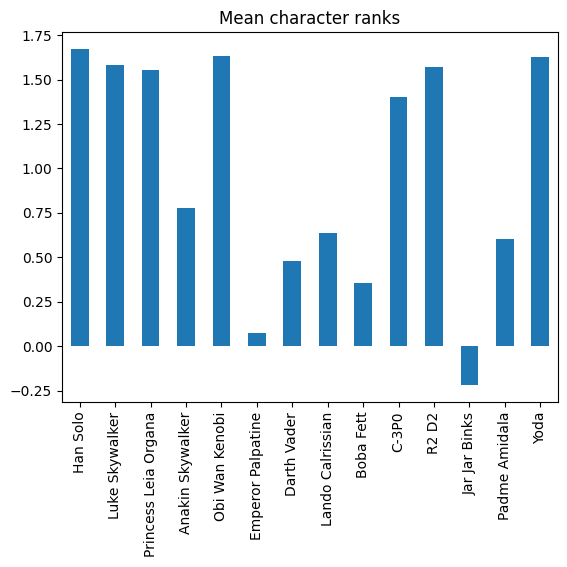

In [68]:
star_wars[star_wars.columns[15:29]].mean().plot.bar()
plt.title("Mean character ranks")
plt.show()

Han Solo, Luke, Leia, Obi-wan, R2 and Yoda. All rank highly, with an average ranking between somewhat and very favourably.  
Lando, Vader, Boba Fett and Padme all rank just above neutral.  
Jar Jar Binks is the only character to have a less than favourable mean ranking.

### Who likes Jar Jar

In [69]:
jar_jar = star_wars[star_wars['Jar Jar Binks'] > 0]
jar_jar.shape

(242, 38)

242 people have a favourable opinion of Jar Jar Binks

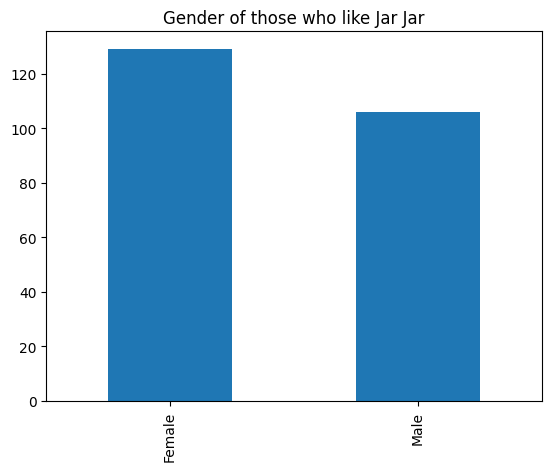

In [70]:
jar_jar['Gender'].value_counts().plot.bar()
plt.title("Gender of those who like Jar Jar")
plt.show()

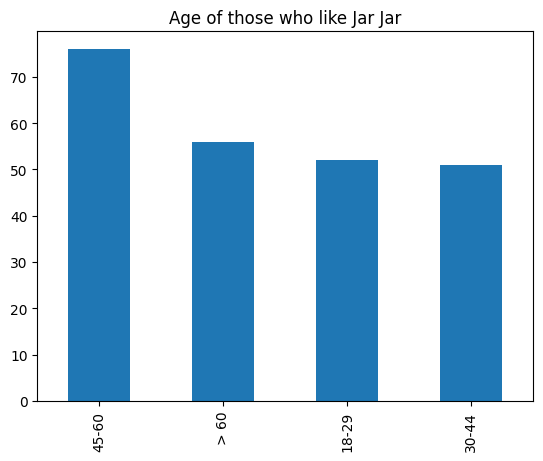

In [72]:
jar_jar['Age'].value_counts().plot.bar()
plt.title("Age of those who like Jar Jar")
plt.show()

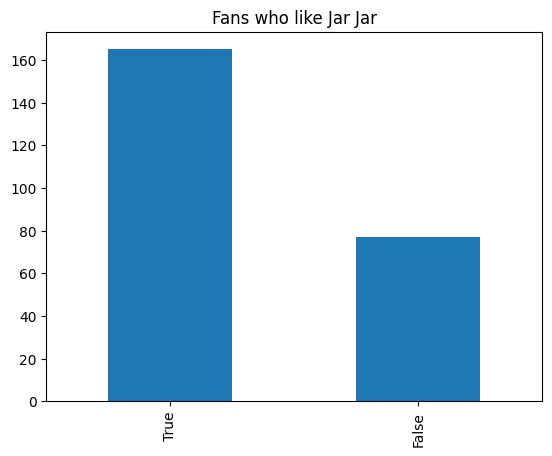

In [74]:
jar_jar["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts().plot.bar()
plt.title("Fans who like Jar Jar")
plt.show()

People who like Jar Jar Binks are more likely to be Female, they are also more likely to be 45 or over.  
Two thirds of people who like Jar Jar Binks say they are Star Wars fans.